### multivariate rational expectations model
### PS7 Q2


In [209]:
import random
import sympy as sym
import numpy as np
from sympy import lambdify
from numpy import linalg as LA
import matplotlib.pyplot as plt


In [210]:
delta = 0.1
#depreciation rate
rho   = 0.9
#autocorrelation of productivity
alpha = 0.3
#capital share
beta  = 0.95
#discount factor
T_g = 1000
T_sgiven = 10
s_given = [0, -0.005, -0.009, -0.013, -0.022, -0.021, -0.019, -0.011, -0.012, -0.003]
var_v = 0.007**2
seed_num = 0

In [211]:
#Getting non-stochastic steady-state values
k_bar = ((1/beta - 1 + delta)/alpha)**(1/(alpha - 1))
c_bar = k_bar**alpha  - delta*k_bar
s_bar = 1

#Describing relationships underlying linear coefficients
a1 = beta*alpha*(alpha - 1)*k_bar**(alpha - 1)
a2 = beta*alpha*k_bar**(alpha - 1)
b1 = 1 - delta + alpha*k_bar**(alpha - 1)
b2 = k_bar**(alpha - 1)
b3 = -c_bar/k_bar



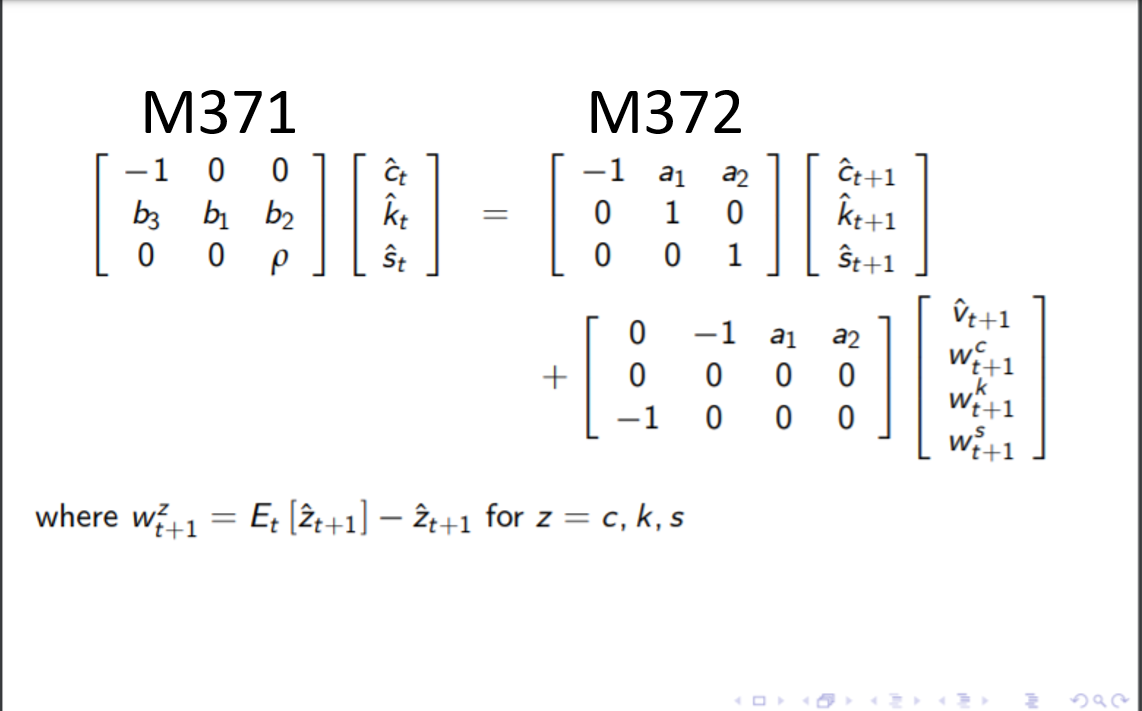

In [212]:
#Writing dynamic equilibrium conditions into matrix form

m371 =  np.zeros([3,3])
m371[0, 0] = -1
m371[1, 0] = b3
m371[1, 1] = b1
m371[1, 2] = b2
m371[2, 2] = rho

m372 =  np.zeros([3,3])
m372[0, 0] = -1
m372[0, 1] = a1
m372[0, 2] = a2
m372[1, 1] = 1
m372[2, 2] = 1

m38 = np.linalg.inv(m371)
A = np.dot(m38, m372)

#Calculate Eigenvectors and Eigenvalues of A
Lam_temp, Q_temp = LA.eig(A)

In [213]:
#make stable eigenvalue and the corresponding eigenvector in the first positions 
#NOTICE if lam_temp is not array may cause prb
idx = Lam_temp.argmin()
Lam = np.c_[Lam_temp[idx], Lam_temp[: idx], Lam_temp[idx + 1:]]
Q = np.c_[Q_temp[:, idx], Q_temp[:, : idx], Q_temp[:, idx + 1:]]

#A = QΛQ_inv
Q_inv = np.linalg.inv(Q)

In [214]:
#key restriction
#get free var consumption as function of capital, productivity-state
c_coeff_k = -Q_inv[0, 1]/Q_inv[0, 0]
c_coeff_s = -Q_inv[0, 2]/Q_inv[0, 0]


In [215]:
#productivity values
s_t = [] + s_given

random.seed(seed_num)
#Obtain productivity levels
for t in range(T_sgiven, T_g):
    s_t.append(rho*s_t[-1] + var_v**(0.5) * random.uniform(-1, 1))


In [216]:
k_t = [0]
c_t = []
y_t = []



#Generate time series variables = the given shock realizations
#Impose  key equilibrium restriction from rational expectations
#free var consumption is fnct of predetermined variables capital & productivity state
#output deviation: log linearization production y_t = s_t*(k^{alpha}_t)
#\hat{y}_t = \hat{s}_t + alpha*\hat{k}_t
for t in range(T_g):
    c_t.append(c_coeff_k*k_t[t] + c_coeff_s*s_t[t])
    y_t.append(s_t[t] + alpha*k_t[t])
    k_t.append(b1*k_t[t] + b2*s_t[t] + b3*c_t[t])


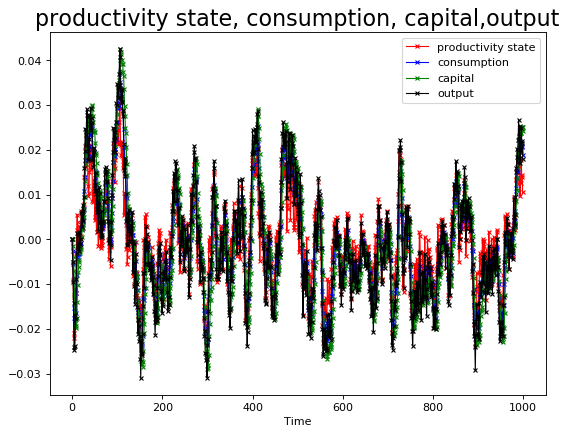

In [217]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(list(range(0, T_g)), s_t, marker='x', markerfacecolor='red', markersize=4, color='red', linewidth=1, label='productivity state')
plt.plot(list(range(0, T_g)), c_t, marker='x', markerfacecolor='blue', markersize=4, color='blue', linewidth=1, label='consumption')
plt.plot(list(range(0, T_g + 1)), k_t, marker='x', markerfacecolor='green', markersize=4, color='green', linewidth=1, label='capital')
plt.plot(list(range(0, T_g)), y_t, marker='x', markerfacecolor='black', markersize=4, color='black', linewidth=1, label='output')

plt.xlabel('Time')
plt.title('productivity state, consumption, capital,output',FontSize = 20)

plt.legend()
plt.show()